In [ ]:
from collections import Counter

import pandas as pd

applications = pd.read_json("../../data/applications.json")
people = pd.read_json("../../data/people.json")
jobs = pd.read_json("../../data/jobs.json")

master = people.merge(right=applications, how='inner', left_on='id', right_on='personId').merge(right=jobs, how='inner',
                                                                                                left_on='jobId',
                                                                                                right_on='id')
cities = pd.DataFrame(columns=['cities'], data=map(lambda x: x['city'], map(dict, master['address'])))

visual = master[['title', 'status']].join(cities)
visual

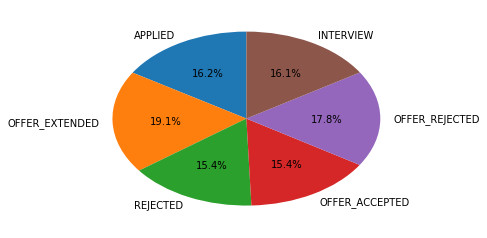

In [21]:
from matplotlib.pyplot import pie

status = Counter(visual['status'])
status = pd.DataFrame(data=status.values(), index=status.keys())
status

plot = pie(status[0], labels=status.index, autopct='%1.1f%%', startangle=90)

In [35]:
for title in visual['title'].unique():
    plot = visual.where((visual['title'] == title) & ((visual['status'] == 'OFFER_ACCEPTED') | (visual['status'] == 'OFFER_EXTENDED'))).groupby(
        'cities').agg({'cities': 'count'}).plot.bar(title="Number of positive applicant for {0} vs. cities".format(title))


cities
title                  cities                          
Account Executive      Baborow                        2
                       Harrisburg                     2
                       Huating                        1
                       Izumi                          1
                       La Concepcion                  1
                       Ocucaje                        2
                       San Antonio de Los Altos       2
                       San Francisco                  1
                       Walakeri                       3
                       Zamboanga                      1
Adjunct Professor      Artemivsk                      4
                       Baborow                        4
                       Chengji                        2
                       Dvorichna                      2
                       El Carmen de Bolivar           6
                       Halamendu                      4
                       Harrisburg                     3
                       Huating                        5
                       Izumi                          2
                       Juexi                          4
                       La Concepcion                  6
                       Marechal Candido Rondon        3
                       Ocucaje                        1
                       Piran                          3
                       Raydah                         2
                       San Francisco                  2
                       Sec                            6
                       Walakeri                       3
                       Zamboanga                      3
Ballistic Test Article Baborow                        1
...                                                 ...
Test Pilot             Izumi                          7
                       Juexi                          6
                       La Concepcion                  9
                       Marechal Candido Rondon       14
                       Ocucaje                       10
                       Piran                          7
                       Raydah                         8
                       San Antonio de Los Altos       8
                       San Francisco                  9
                       Sec                           16
                       Walakeri                       8
                       Zamboanga                      6
Vice President         Artemivsk                      1
                       Chengji                        3
                       Dvorichna                      2
                       El Carmen de Bolivar           2
                       Halamendu                      1
                       Harrisburg                     2
                       Huating                        2
                       Izumi                          2
                       Juexi                          1
                       La Concepcion                  1
                       Marechal Candido Rondon        2
                       Ocucaje                        5
                       Piran                          1
                       San Antonio de Los Altos       1
                       San Francisco                  6
                       Sec                            1
                       Walakeri                       1
                       Zamboanga                      2

[535 rows x 1 columns]

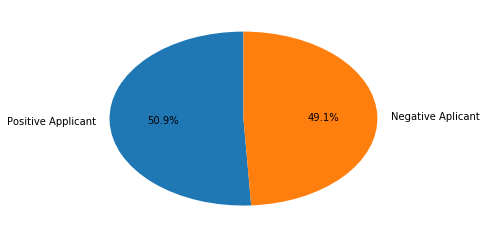

In [58]:
positive_applicant = visual.where((visual['status'] == 'OFFER_ACCEPTED') | (visual['status'] == 'OFFER_EXTENDED')).agg(
    {'status': 'count'})
positive_applicant

negative_applicant = visual.where((visual['status'] == 'OFFER_REJECTED') | (visual['status'] == 'REJECTED')).agg(
    {'status': 'count'})
negative_applicant

plot = pie(pd.Series([positive_applicant, negative_applicant]), labels=['Positive Applicant', 'Negative Aplicant'],
           startangle=90, autopct='%1.1f%%', )


In [71]:
# Positive Applicants
positive_applicant = visual.where(
    (visual['status'] == 'OFFER_ACCEPTED') | (visual['status'] == 'OFFER_EXTENDED')).groupby('cities').agg(
    {'cities': 'count'})
plot = positive_applicant.plot.bar(title='Positive Applicants vs Cities', figsize=(20, 12))


,cities
cities,
Artemivsk,34
Baborow,28
Chengji,43
Dvorichna,30
El Carmen de Bolivar,36
Halamendu,43
Harrisburg,28
Huating,34
Izumi,46


In [72]:
# Negative Applicants
negative_applicant = visual.where((visual['status'] == 'OFFER_REJECTED') | (visual['status'] == 'REJECTED')).groupby(
    'cities').agg({'cities': 'count'})
plot = negative_applicant.plot.bar(title='Negative Applicants vs Cities', figsize=(20, 12))

,cities
cities,
Artemivsk,32
Baborow,29
Chengji,38
Dvorichna,33
El Carmen de Bolivar,32
Halamendu,23
Harrisburg,35
Huating,46
Izumi,39
